# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

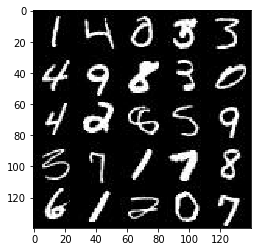

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

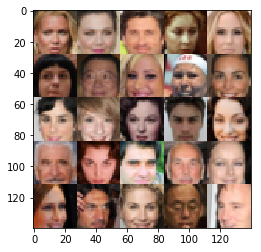

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        # conv1
        x1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)
        
        # conv2
        x2 = tf.layers.conv2d(x1, 128, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.nn.relu(x2)
        
        # conv3
        x3 = tf.layers.conv2d(x2, 256, 3, strides=2, padding='same', activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.nn.relu(x3)
        
        # flatten
        flat = tf.reshape(x3, (-1, 4 * 4 * 256))
        
        # out
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # fc
        x1 = tf.layers.dense(z, 7 * 7 * 512)

        #  reshape
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.relu(x1)

        # conv1
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)

        # conv2
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.relu(x3)

        # out
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [13]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode)
    # 2 None None None None <bound method Dataset.get_batches...> (60000, 28, 28, 1) L
    
    steps = 0
    # def model_inputs(image_width, image_height, image_channels, z_dim):
    inputs_real, inputs_z, inputs_learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], 
                                                               z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2
                
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, 
                                               inputs_learning_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, 
                                               inputs_learning_rate: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = sess.run(d_loss, feed_dict={inputs_real: batch_images, inputs_z: batch_z})
                    train_loss_g = sess.run(g_loss, feed_dict={inputs_z: batch_z})
                    
                    print("Epoch {}/{}".format(epoch_i + 1, epoch_count),
                         "Discriminator Loss: {:.4f}".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    # def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
                    show_generator_output(sess, 10, inputs_z, data_shape[3], data_image_mode)
                    
                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

2 32 100 0.002 0.5 <bound method Dataset.get_batches of <helper.Dataset object at 0x7f5a2c9b35c0>> (60000, 28, 28, 1) L
Epoch 1/2 Discriminator Loss: 0.3916 Generator Loss: 7.9665
Epoch 1/2 Discriminator Loss: 0.3330 Generator Loss: 8.6394
Epoch 1/2 Discriminator Loss: 0.3327 Generator Loss: 9.1499
Epoch 1/2 Discriminator Loss: 0.3379 Generator Loss: 7.7406
Epoch 1/2 Discriminator Loss: 0.3372 Generator Loss: 8.0753
Epoch 1/2 Discriminator Loss: 0.3364 Generator Loss: 8.2684
Epoch 1/2 Discriminator Loss: 0.3315 Generator Loss: 8.2111
Epoch 1/2 Discriminator Loss: 2.0172 Generator Loss: 9.6512
Epoch 1/2 Discriminator Loss: 1.4254 Generator Loss: 0.7226
Epoch 1/2 Discriminator Loss: 0.3701 Generator Loss: 5.0854


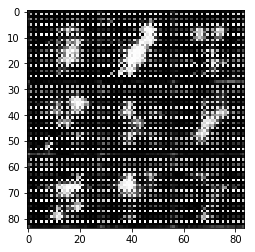

Epoch 1/2 Discriminator Loss: 0.7451 Generator Loss: 2.7774
Epoch 1/2 Discriminator Loss: 1.3875 Generator Loss: 0.9868
Epoch 1/2 Discriminator Loss: 1.3349 Generator Loss: 0.7475
Epoch 1/2 Discriminator Loss: 1.2831 Generator Loss: 0.7275
Epoch 1/2 Discriminator Loss: 1.6621 Generator Loss: 0.4152
Epoch 1/2 Discriminator Loss: 1.3478 Generator Loss: 0.8763
Epoch 1/2 Discriminator Loss: 1.1456 Generator Loss: 0.7770
Epoch 1/2 Discriminator Loss: 1.4098 Generator Loss: 0.5565
Epoch 1/2 Discriminator Loss: 1.1561 Generator Loss: 1.0576
Epoch 1/2 Discriminator Loss: 1.5659 Generator Loss: 1.7525


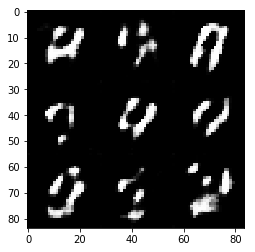

Epoch 1/2 Discriminator Loss: 1.1250 Generator Loss: 1.4480
Epoch 1/2 Discriminator Loss: 1.1446 Generator Loss: 1.0082
Epoch 1/2 Discriminator Loss: 1.5048 Generator Loss: 0.4632
Epoch 1/2 Discriminator Loss: 1.1645 Generator Loss: 0.9792
Epoch 1/2 Discriminator Loss: 1.4868 Generator Loss: 0.6159
Epoch 1/2 Discriminator Loss: 1.3709 Generator Loss: 0.5172
Epoch 1/2 Discriminator Loss: 1.5290 Generator Loss: 0.4479
Epoch 1/2 Discriminator Loss: 1.9683 Generator Loss: 0.2514
Epoch 1/2 Discriminator Loss: 1.3054 Generator Loss: 0.6640
Epoch 1/2 Discriminator Loss: 1.3888 Generator Loss: 0.6247


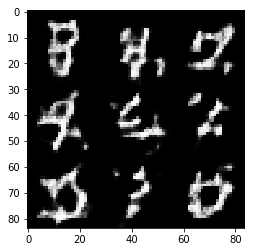

Epoch 1/2 Discriminator Loss: 1.3056 Generator Loss: 0.7993
Epoch 1/2 Discriminator Loss: 1.5207 Generator Loss: 1.1082
Epoch 1/2 Discriminator Loss: 1.0924 Generator Loss: 1.2650
Epoch 1/2 Discriminator Loss: 1.4989 Generator Loss: 0.4228
Epoch 1/2 Discriminator Loss: 1.4380 Generator Loss: 0.4886
Epoch 1/2 Discriminator Loss: 1.1529 Generator Loss: 1.5960
Epoch 1/2 Discriminator Loss: 2.0061 Generator Loss: 0.2628
Epoch 1/2 Discriminator Loss: 1.3311 Generator Loss: 0.6191
Epoch 1/2 Discriminator Loss: 1.3441 Generator Loss: 0.5601
Epoch 1/2 Discriminator Loss: 1.3762 Generator Loss: 0.5759


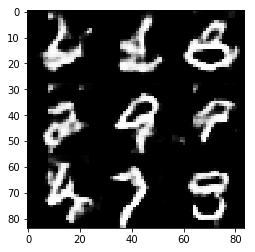

Epoch 1/2 Discriminator Loss: 1.2851 Generator Loss: 0.6063
Epoch 1/2 Discriminator Loss: 1.5607 Generator Loss: 0.4800
Epoch 1/2 Discriminator Loss: 1.2387 Generator Loss: 0.7955
Epoch 1/2 Discriminator Loss: 1.3467 Generator Loss: 0.6754
Epoch 1/2 Discriminator Loss: 1.3826 Generator Loss: 0.6107
Epoch 1/2 Discriminator Loss: 1.2150 Generator Loss: 0.7257
Epoch 1/2 Discriminator Loss: 1.8387 Generator Loss: 2.7187
Epoch 1/2 Discriminator Loss: 1.2867 Generator Loss: 0.8223
Epoch 1/2 Discriminator Loss: 1.1737 Generator Loss: 1.0100
Epoch 1/2 Discriminator Loss: 1.9038 Generator Loss: 0.2836


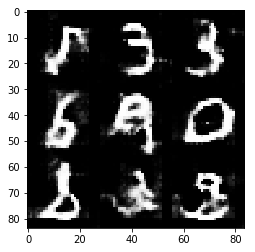

Epoch 1/2 Discriminator Loss: 1.1687 Generator Loss: 0.9915
Epoch 1/2 Discriminator Loss: 1.3835 Generator Loss: 0.5614
Epoch 1/2 Discriminator Loss: 1.2482 Generator Loss: 0.8982
Epoch 1/2 Discriminator Loss: 1.1664 Generator Loss: 0.8317
Epoch 1/2 Discriminator Loss: 1.5126 Generator Loss: 0.6396
Epoch 1/2 Discriminator Loss: 1.3347 Generator Loss: 0.5637
Epoch 1/2 Discriminator Loss: 1.4496 Generator Loss: 0.5214
Epoch 1/2 Discriminator Loss: 1.3898 Generator Loss: 0.5738
Epoch 1/2 Discriminator Loss: 1.0707 Generator Loss: 1.1368
Epoch 1/2 Discriminator Loss: 1.6735 Generator Loss: 0.3440


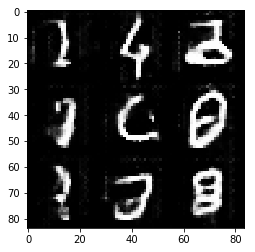

Epoch 1/2 Discriminator Loss: 1.2057 Generator Loss: 0.6446
Epoch 1/2 Discriminator Loss: 2.0162 Generator Loss: 0.2937
Epoch 1/2 Discriminator Loss: 1.1683 Generator Loss: 1.4768
Epoch 1/2 Discriminator Loss: 1.5895 Generator Loss: 0.4371
Epoch 1/2 Discriminator Loss: 0.8850 Generator Loss: 1.0383
Epoch 1/2 Discriminator Loss: 1.1280 Generator Loss: 0.8292
Epoch 1/2 Discriminator Loss: 0.9509 Generator Loss: 1.5014
Epoch 1/2 Discriminator Loss: 1.0070 Generator Loss: 1.5762
Epoch 1/2 Discriminator Loss: 1.6595 Generator Loss: 0.4120
Epoch 1/2 Discriminator Loss: 1.4762 Generator Loss: 0.4772


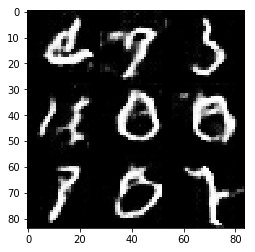

Epoch 1/2 Discriminator Loss: 1.1731 Generator Loss: 0.7846
Epoch 1/2 Discriminator Loss: 1.3625 Generator Loss: 0.6410
Epoch 1/2 Discriminator Loss: 1.1684 Generator Loss: 0.8787
Epoch 1/2 Discriminator Loss: 1.7982 Generator Loss: 0.3331
Epoch 1/2 Discriminator Loss: 1.0488 Generator Loss: 1.5081
Epoch 1/2 Discriminator Loss: 1.3620 Generator Loss: 0.6003
Epoch 1/2 Discriminator Loss: 1.0411 Generator Loss: 1.3200
Epoch 1/2 Discriminator Loss: 0.9413 Generator Loss: 1.1623
Epoch 1/2 Discriminator Loss: 1.1914 Generator Loss: 0.8802
Epoch 1/2 Discriminator Loss: 1.7775 Generator Loss: 0.3503


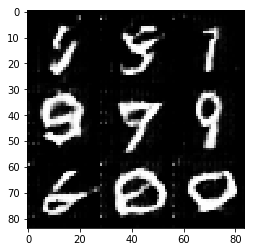

Epoch 1/2 Discriminator Loss: 1.6166 Generator Loss: 0.3973
Epoch 1/2 Discriminator Loss: 1.0509 Generator Loss: 0.9373
Epoch 1/2 Discriminator Loss: 1.1704 Generator Loss: 2.2534
Epoch 1/2 Discriminator Loss: 1.4396 Generator Loss: 0.5121
Epoch 1/2 Discriminator Loss: 0.7088 Generator Loss: 1.5253
Epoch 1/2 Discriminator Loss: 1.0123 Generator Loss: 0.9643
Epoch 1/2 Discriminator Loss: 1.4623 Generator Loss: 0.4715
Epoch 1/2 Discriminator Loss: 1.0052 Generator Loss: 1.0500
Epoch 1/2 Discriminator Loss: 1.0386 Generator Loss: 0.9349
Epoch 1/2 Discriminator Loss: 1.5449 Generator Loss: 0.4984


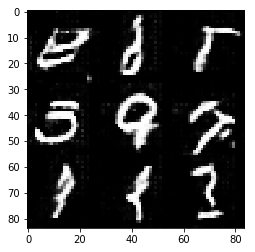

Epoch 1/2 Discriminator Loss: 0.7180 Generator Loss: 2.1331
Epoch 1/2 Discriminator Loss: 0.9794 Generator Loss: 1.0140
Epoch 1/2 Discriminator Loss: 1.3036 Generator Loss: 0.6110
Epoch 1/2 Discriminator Loss: 1.1305 Generator Loss: 1.2435
Epoch 1/2 Discriminator Loss: 1.4343 Generator Loss: 1.4550
Epoch 1/2 Discriminator Loss: 1.2726 Generator Loss: 0.8518
Epoch 1/2 Discriminator Loss: 1.1863 Generator Loss: 0.8382
Epoch 1/2 Discriminator Loss: 1.1141 Generator Loss: 0.7261
Epoch 1/2 Discriminator Loss: 1.3833 Generator Loss: 0.5283
Epoch 1/2 Discriminator Loss: 1.2262 Generator Loss: 1.1016


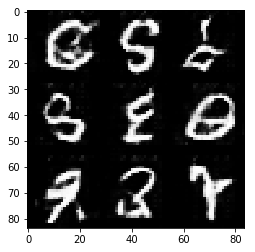

Epoch 1/2 Discriminator Loss: 1.1707 Generator Loss: 0.7937
Epoch 1/2 Discriminator Loss: 0.9570 Generator Loss: 1.0664
Epoch 1/2 Discriminator Loss: 1.6621 Generator Loss: 0.4072
Epoch 1/2 Discriminator Loss: 1.2381 Generator Loss: 0.6636
Epoch 1/2 Discriminator Loss: 0.8991 Generator Loss: 1.4872
Epoch 1/2 Discriminator Loss: 1.2148 Generator Loss: 1.0631
Epoch 1/2 Discriminator Loss: 1.2394 Generator Loss: 0.6955
Epoch 1/2 Discriminator Loss: 1.0709 Generator Loss: 0.8402
Epoch 1/2 Discriminator Loss: 1.1773 Generator Loss: 0.7330
Epoch 1/2 Discriminator Loss: 1.3843 Generator Loss: 0.6873


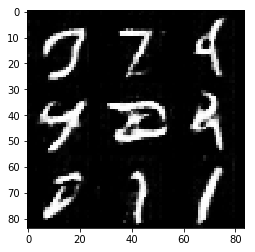

Epoch 1/2 Discriminator Loss: 1.3318 Generator Loss: 0.6694
Epoch 1/2 Discriminator Loss: 1.2415 Generator Loss: 1.1974
Epoch 1/2 Discriminator Loss: 1.3598 Generator Loss: 0.6360
Epoch 1/2 Discriminator Loss: 2.0038 Generator Loss: 0.2681
Epoch 1/2 Discriminator Loss: 1.2003 Generator Loss: 0.7243
Epoch 1/2 Discriminator Loss: 0.9368 Generator Loss: 1.4995
Epoch 1/2 Discriminator Loss: 1.2981 Generator Loss: 0.6810
Epoch 1/2 Discriminator Loss: 1.3592 Generator Loss: 0.5966
Epoch 1/2 Discriminator Loss: 1.3036 Generator Loss: 1.7193
Epoch 1/2 Discriminator Loss: 0.8549 Generator Loss: 1.1295


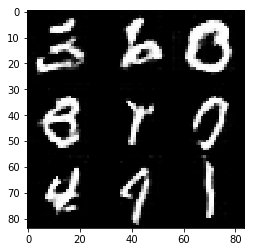

Epoch 1/2 Discriminator Loss: 1.6210 Generator Loss: 0.4003
Epoch 1/2 Discriminator Loss: 1.9363 Generator Loss: 0.3209
Epoch 1/2 Discriminator Loss: 0.7853 Generator Loss: 1.2753
Epoch 1/2 Discriminator Loss: 1.0954 Generator Loss: 0.8954
Epoch 1/2 Discriminator Loss: 1.0748 Generator Loss: 1.4915
Epoch 1/2 Discriminator Loss: 1.1030 Generator Loss: 0.9849
Epoch 1/2 Discriminator Loss: 0.7128 Generator Loss: 1.5239
Epoch 1/2 Discriminator Loss: 0.9522 Generator Loss: 1.7965
Epoch 1/2 Discriminator Loss: 1.9028 Generator Loss: 0.3090
Epoch 1/2 Discriminator Loss: 1.0407 Generator Loss: 0.9875


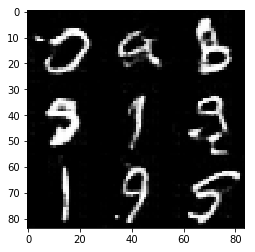

Epoch 1/2 Discriminator Loss: 1.2855 Generator Loss: 0.5825
Epoch 1/2 Discriminator Loss: 0.9203 Generator Loss: 1.0789
Epoch 1/2 Discriminator Loss: 0.8056 Generator Loss: 1.6439
Epoch 1/2 Discriminator Loss: 1.2080 Generator Loss: 0.7130
Epoch 1/2 Discriminator Loss: 1.4226 Generator Loss: 0.5848
Epoch 1/2 Discriminator Loss: 1.2420 Generator Loss: 1.4759
Epoch 1/2 Discriminator Loss: 1.3929 Generator Loss: 0.5948
Epoch 1/2 Discriminator Loss: 1.1133 Generator Loss: 0.9400
Epoch 1/2 Discriminator Loss: 1.2084 Generator Loss: 1.4913
Epoch 1/2 Discriminator Loss: 1.1423 Generator Loss: 0.8278


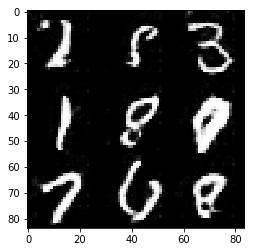

Epoch 1/2 Discriminator Loss: 1.0624 Generator Loss: 1.7460
Epoch 1/2 Discriminator Loss: 1.3016 Generator Loss: 0.5371
Epoch 1/2 Discriminator Loss: 1.3193 Generator Loss: 0.6565
Epoch 1/2 Discriminator Loss: 1.4957 Generator Loss: 0.5469
Epoch 1/2 Discriminator Loss: 1.1074 Generator Loss: 1.2985
Epoch 1/2 Discriminator Loss: 1.0505 Generator Loss: 0.8352
Epoch 1/2 Discriminator Loss: 1.3049 Generator Loss: 0.7331
Epoch 1/2 Discriminator Loss: 0.9645 Generator Loss: 1.7522
Epoch 1/2 Discriminator Loss: 1.1679 Generator Loss: 2.4116
Epoch 1/2 Discriminator Loss: 0.9719 Generator Loss: 1.0515


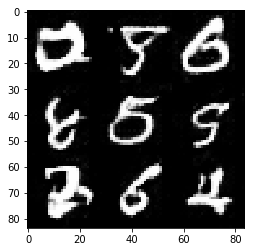

Epoch 1/2 Discriminator Loss: 0.8865 Generator Loss: 1.3155
Epoch 1/2 Discriminator Loss: 0.7435 Generator Loss: 1.7814
Epoch 1/2 Discriminator Loss: 0.9724 Generator Loss: 1.4178
Epoch 1/2 Discriminator Loss: 1.2164 Generator Loss: 0.7528
Epoch 1/2 Discriminator Loss: 1.1536 Generator Loss: 0.7357
Epoch 1/2 Discriminator Loss: 0.9853 Generator Loss: 1.1612
Epoch 1/2 Discriminator Loss: 0.8389 Generator Loss: 1.5733
Epoch 1/2 Discriminator Loss: 2.4913 Generator Loss: 0.2034
Epoch 1/2 Discriminator Loss: 0.9657 Generator Loss: 1.1124
Epoch 1/2 Discriminator Loss: 1.0051 Generator Loss: 1.5213


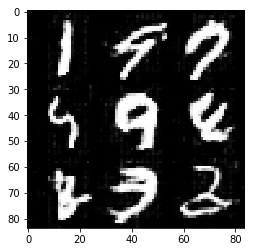

Epoch 1/2 Discriminator Loss: 1.5312 Generator Loss: 0.5976
Epoch 1/2 Discriminator Loss: 0.9104 Generator Loss: 1.0589
Epoch 1/2 Discriminator Loss: 0.9440 Generator Loss: 1.1516
Epoch 1/2 Discriminator Loss: 1.1360 Generator Loss: 1.0218
Epoch 1/2 Discriminator Loss: 0.9889 Generator Loss: 0.9870
Epoch 1/2 Discriminator Loss: 1.6233 Generator Loss: 0.4328
Epoch 1/2 Discriminator Loss: 1.2905 Generator Loss: 2.2020
Epoch 1/2 Discriminator Loss: 0.8889 Generator Loss: 1.4018
Epoch 1/2 Discriminator Loss: 1.0203 Generator Loss: 1.0767
Epoch 1/2 Discriminator Loss: 1.2617 Generator Loss: 0.9078


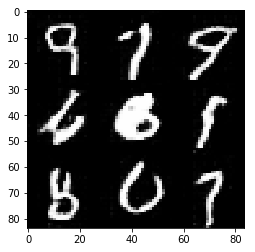

Epoch 1/2 Discriminator Loss: 2.0471 Generator Loss: 0.2894
Epoch 1/2 Discriminator Loss: 0.9985 Generator Loss: 0.9689
Epoch 1/2 Discriminator Loss: 0.7479 Generator Loss: 1.3214
Epoch 1/2 Discriminator Loss: 2.1887 Generator Loss: 0.2271
Epoch 1/2 Discriminator Loss: 1.5391 Generator Loss: 0.5145
Epoch 1/2 Discriminator Loss: 1.2393 Generator Loss: 0.7196
Epoch 1/2 Discriminator Loss: 0.8555 Generator Loss: 1.3992
Epoch 1/2 Discriminator Loss: 1.4544 Generator Loss: 0.4994
Epoch 1/2 Discriminator Loss: 1.1444 Generator Loss: 0.8022
Epoch 1/2 Discriminator Loss: 0.9142 Generator Loss: 1.0626


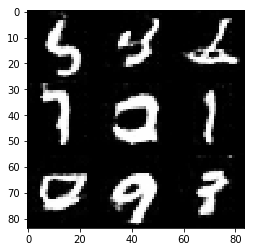

Epoch 1/2 Discriminator Loss: 1.1723 Generator Loss: 0.8238
Epoch 1/2 Discriminator Loss: 0.8951 Generator Loss: 1.3429
Epoch 1/2 Discriminator Loss: 1.5646 Generator Loss: 0.4421
Epoch 1/2 Discriminator Loss: 1.5841 Generator Loss: 0.4365
Epoch 1/2 Discriminator Loss: 1.3617 Generator Loss: 0.5818
Epoch 1/2 Discriminator Loss: 1.2272 Generator Loss: 0.7689
Epoch 1/2 Discriminator Loss: 1.3757 Generator Loss: 0.5827
Epoch 2/2 Discriminator Loss: 0.9113 Generator Loss: 1.0680
Epoch 2/2 Discriminator Loss: 1.2978 Generator Loss: 0.6793
Epoch 2/2 Discriminator Loss: 0.8603 Generator Loss: 1.3691


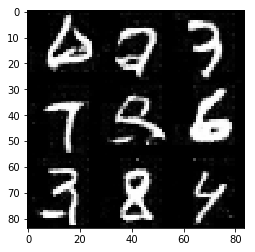

Epoch 2/2 Discriminator Loss: 1.3111 Generator Loss: 0.6314
Epoch 2/2 Discriminator Loss: 1.6423 Generator Loss: 0.4607
Epoch 2/2 Discriminator Loss: 1.0059 Generator Loss: 0.9290
Epoch 2/2 Discriminator Loss: 0.9046 Generator Loss: 1.3725
Epoch 2/2 Discriminator Loss: 1.2363 Generator Loss: 0.7564
Epoch 2/2 Discriminator Loss: 1.2445 Generator Loss: 0.6429
Epoch 2/2 Discriminator Loss: 1.7851 Generator Loss: 0.3317
Epoch 2/2 Discriminator Loss: 1.0020 Generator Loss: 1.1959
Epoch 2/2 Discriminator Loss: 1.3082 Generator Loss: 0.6547
Epoch 2/2 Discriminator Loss: 1.2331 Generator Loss: 0.8100


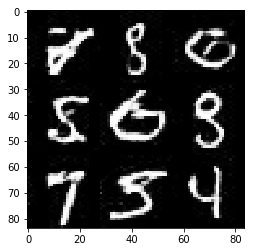

Epoch 2/2 Discriminator Loss: 1.4131 Generator Loss: 2.1606
Epoch 2/2 Discriminator Loss: 1.1318 Generator Loss: 0.7220
Epoch 2/2 Discriminator Loss: 1.9212 Generator Loss: 0.4261
Epoch 2/2 Discriminator Loss: 1.5285 Generator Loss: 0.4791
Epoch 2/2 Discriminator Loss: 0.9275 Generator Loss: 1.5095
Epoch 2/2 Discriminator Loss: 0.9353 Generator Loss: 0.9967
Epoch 2/2 Discriminator Loss: 1.1344 Generator Loss: 0.7348
Epoch 2/2 Discriminator Loss: 0.7998 Generator Loss: 1.5782
Epoch 2/2 Discriminator Loss: 2.3744 Generator Loss: 0.1969
Epoch 2/2 Discriminator Loss: 1.9797 Generator Loss: 0.3873


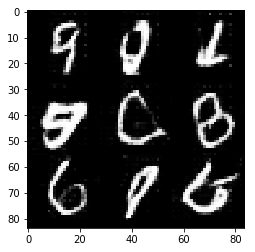

Epoch 2/2 Discriminator Loss: 1.1256 Generator Loss: 2.6628
Epoch 2/2 Discriminator Loss: 0.9717 Generator Loss: 0.9986
Epoch 2/2 Discriminator Loss: 0.9317 Generator Loss: 1.0819
Epoch 2/2 Discriminator Loss: 0.8291 Generator Loss: 1.5963
Epoch 2/2 Discriminator Loss: 1.1374 Generator Loss: 0.8593
Epoch 2/2 Discriminator Loss: 1.1875 Generator Loss: 1.4536
Epoch 2/2 Discriminator Loss: 0.8900 Generator Loss: 1.2132
Epoch 2/2 Discriminator Loss: 1.1253 Generator Loss: 0.7902
Epoch 2/2 Discriminator Loss: 2.3316 Generator Loss: 0.2475
Epoch 2/2 Discriminator Loss: 0.9193 Generator Loss: 1.1660


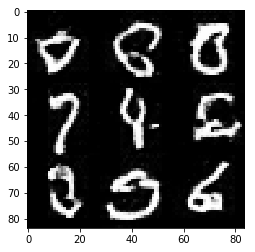

Epoch 2/2 Discriminator Loss: 0.9099 Generator Loss: 1.0623
Epoch 2/2 Discriminator Loss: 1.2571 Generator Loss: 0.7494
Epoch 2/2 Discriminator Loss: 1.5871 Generator Loss: 0.5146
Epoch 2/2 Discriminator Loss: 1.6110 Generator Loss: 0.4471
Epoch 2/2 Discriminator Loss: 1.5546 Generator Loss: 0.5165
Epoch 2/2 Discriminator Loss: 1.0136 Generator Loss: 1.0777
Epoch 2/2 Discriminator Loss: 2.0918 Generator Loss: 0.2983
Epoch 2/2 Discriminator Loss: 1.0134 Generator Loss: 1.2065
Epoch 2/2 Discriminator Loss: 1.3321 Generator Loss: 0.6109
Epoch 2/2 Discriminator Loss: 1.1676 Generator Loss: 0.8386


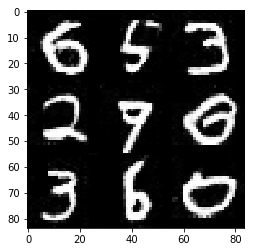

Epoch 2/2 Discriminator Loss: 1.2613 Generator Loss: 0.6495
Epoch 2/2 Discriminator Loss: 1.5242 Generator Loss: 0.5037
Epoch 2/2 Discriminator Loss: 1.2141 Generator Loss: 0.7338
Epoch 2/2 Discriminator Loss: 1.2053 Generator Loss: 0.7479
Epoch 2/2 Discriminator Loss: 1.1905 Generator Loss: 0.8121
Epoch 2/2 Discriminator Loss: 1.2092 Generator Loss: 0.6981
Epoch 2/2 Discriminator Loss: 1.1621 Generator Loss: 0.9083
Epoch 2/2 Discriminator Loss: 1.7917 Generator Loss: 0.3622
Epoch 2/2 Discriminator Loss: 0.8803 Generator Loss: 1.2255
Epoch 2/2 Discriminator Loss: 1.1128 Generator Loss: 0.9766


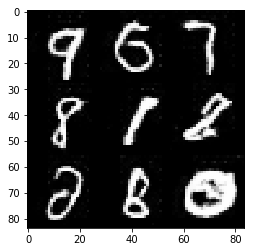

Epoch 2/2 Discriminator Loss: 1.3298 Generator Loss: 0.7325
Epoch 2/2 Discriminator Loss: 1.3416 Generator Loss: 0.6339
Epoch 2/2 Discriminator Loss: 1.7165 Generator Loss: 0.4438
Epoch 2/2 Discriminator Loss: 2.1900 Generator Loss: 0.2528
Epoch 2/2 Discriminator Loss: 1.0141 Generator Loss: 1.2608
Epoch 2/2 Discriminator Loss: 1.2222 Generator Loss: 2.2840
Epoch 2/2 Discriminator Loss: 1.1541 Generator Loss: 0.8191
Epoch 2/2 Discriminator Loss: 1.0225 Generator Loss: 1.5934
Epoch 2/2 Discriminator Loss: 1.0838 Generator Loss: 0.8512
Epoch 2/2 Discriminator Loss: 1.0532 Generator Loss: 0.8429


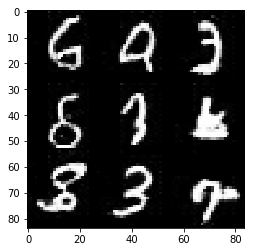

Epoch 2/2 Discriminator Loss: 1.4247 Generator Loss: 0.5259
Epoch 2/2 Discriminator Loss: 1.0956 Generator Loss: 0.8686
Epoch 2/2 Discriminator Loss: 2.2057 Generator Loss: 0.2406
Epoch 2/2 Discriminator Loss: 0.9840 Generator Loss: 0.9831
Epoch 2/2 Discriminator Loss: 0.8224 Generator Loss: 1.6606
Epoch 2/2 Discriminator Loss: 1.4547 Generator Loss: 0.5137
Epoch 2/2 Discriminator Loss: 1.9458 Generator Loss: 0.2962
Epoch 2/2 Discriminator Loss: 2.1842 Generator Loss: 0.3372
Epoch 2/2 Discriminator Loss: 1.2052 Generator Loss: 0.7265
Epoch 2/2 Discriminator Loss: 0.9026 Generator Loss: 1.1224


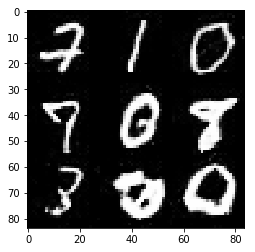

Epoch 2/2 Discriminator Loss: 0.8898 Generator Loss: 1.2617
Epoch 2/2 Discriminator Loss: 1.2958 Generator Loss: 0.6732
Epoch 2/2 Discriminator Loss: 1.0555 Generator Loss: 0.9792
Epoch 2/2 Discriminator Loss: 0.9629 Generator Loss: 0.9458
Epoch 2/2 Discriminator Loss: 1.8643 Generator Loss: 0.3404
Epoch 2/2 Discriminator Loss: 1.4385 Generator Loss: 0.5425
Epoch 2/2 Discriminator Loss: 1.0023 Generator Loss: 1.1611
Epoch 2/2 Discriminator Loss: 0.9549 Generator Loss: 1.2228
Epoch 2/2 Discriminator Loss: 0.7361 Generator Loss: 2.1936
Epoch 2/2 Discriminator Loss: 2.2188 Generator Loss: 0.2542


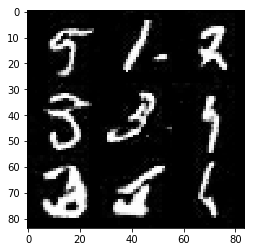

Epoch 2/2 Discriminator Loss: 1.2318 Generator Loss: 0.7485
Epoch 2/2 Discriminator Loss: 1.2802 Generator Loss: 0.6966
Epoch 2/2 Discriminator Loss: 1.4944 Generator Loss: 0.5181
Epoch 2/2 Discriminator Loss: 0.7615 Generator Loss: 1.5796
Epoch 2/2 Discriminator Loss: 2.4900 Generator Loss: 0.1703
Epoch 2/2 Discriminator Loss: 1.2946 Generator Loss: 0.6610
Epoch 2/2 Discriminator Loss: 1.9461 Generator Loss: 0.3077
Epoch 2/2 Discriminator Loss: 0.9655 Generator Loss: 1.1940
Epoch 2/2 Discriminator Loss: 0.8268 Generator Loss: 2.0410
Epoch 2/2 Discriminator Loss: 1.5185 Generator Loss: 0.5532


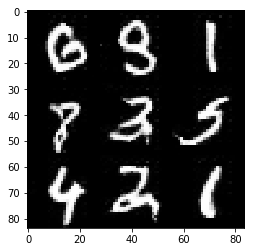

Epoch 2/2 Discriminator Loss: 0.8262 Generator Loss: 1.2521
Epoch 2/2 Discriminator Loss: 1.4305 Generator Loss: 0.5543
Epoch 2/2 Discriminator Loss: 0.7806 Generator Loss: 1.5058
Epoch 2/2 Discriminator Loss: 0.8653 Generator Loss: 1.6670
Epoch 2/2 Discriminator Loss: 0.9301 Generator Loss: 1.2284
Epoch 2/2 Discriminator Loss: 0.8700 Generator Loss: 1.4635
Epoch 2/2 Discriminator Loss: 1.3108 Generator Loss: 0.7257
Epoch 2/2 Discriminator Loss: 1.0471 Generator Loss: 0.9585
Epoch 2/2 Discriminator Loss: 1.2274 Generator Loss: 0.7221
Epoch 2/2 Discriminator Loss: 1.0963 Generator Loss: 0.8278


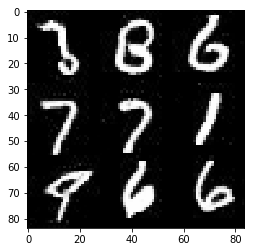

Epoch 2/2 Discriminator Loss: 0.9092 Generator Loss: 1.0678
Epoch 2/2 Discriminator Loss: 1.4014 Generator Loss: 0.6515
Epoch 2/2 Discriminator Loss: 2.0066 Generator Loss: 0.2961
Epoch 2/2 Discriminator Loss: 1.4268 Generator Loss: 0.5826
Epoch 2/2 Discriminator Loss: 1.4777 Generator Loss: 0.5448
Epoch 2/2 Discriminator Loss: 1.1205 Generator Loss: 0.8205
Epoch 2/2 Discriminator Loss: 0.9147 Generator Loss: 1.1050
Epoch 2/2 Discriminator Loss: 1.2263 Generator Loss: 0.9468
Epoch 2/2 Discriminator Loss: 1.1476 Generator Loss: 0.7864
Epoch 2/2 Discriminator Loss: 1.0827 Generator Loss: 1.7126


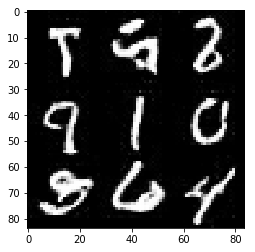

Epoch 2/2 Discriminator Loss: 0.9754 Generator Loss: 1.9025
Epoch 2/2 Discriminator Loss: 1.3771 Generator Loss: 0.6538
Epoch 2/2 Discriminator Loss: 0.8960 Generator Loss: 1.9756
Epoch 2/2 Discriminator Loss: 0.8935 Generator Loss: 1.1649
Epoch 2/2 Discriminator Loss: 0.8382 Generator Loss: 1.2851
Epoch 2/2 Discriminator Loss: 0.8419 Generator Loss: 1.4797
Epoch 2/2 Discriminator Loss: 0.9688 Generator Loss: 1.2771
Epoch 2/2 Discriminator Loss: 1.3808 Generator Loss: 0.5920
Epoch 2/2 Discriminator Loss: 1.6322 Generator Loss: 0.4325
Epoch 2/2 Discriminator Loss: 0.8058 Generator Loss: 1.2788


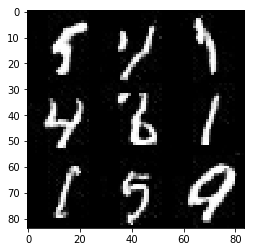

Epoch 2/2 Discriminator Loss: 1.4221 Generator Loss: 0.6164
Epoch 2/2 Discriminator Loss: 0.9920 Generator Loss: 1.1722
Epoch 2/2 Discriminator Loss: 1.7223 Generator Loss: 0.3527
Epoch 2/2 Discriminator Loss: 1.0930 Generator Loss: 1.0064
Epoch 2/2 Discriminator Loss: 1.4206 Generator Loss: 0.5355
Epoch 2/2 Discriminator Loss: 1.7066 Generator Loss: 0.4923
Epoch 2/2 Discriminator Loss: 0.9797 Generator Loss: 0.9443
Epoch 2/2 Discriminator Loss: 1.7530 Generator Loss: 0.3634
Epoch 2/2 Discriminator Loss: 1.5795 Generator Loss: 0.4474
Epoch 2/2 Discriminator Loss: 0.8451 Generator Loss: 1.2751


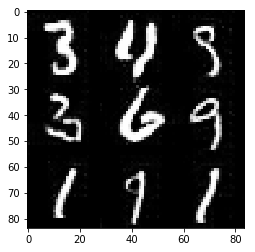

Epoch 2/2 Discriminator Loss: 1.7020 Generator Loss: 0.3953
Epoch 2/2 Discriminator Loss: 1.3224 Generator Loss: 0.6285
Epoch 2/2 Discriminator Loss: 1.1083 Generator Loss: 0.8054
Epoch 2/2 Discriminator Loss: 1.0471 Generator Loss: 1.1229
Epoch 2/2 Discriminator Loss: 0.8770 Generator Loss: 1.5967
Epoch 2/2 Discriminator Loss: 1.4080 Generator Loss: 0.5268
Epoch 2/2 Discriminator Loss: 1.9058 Generator Loss: 0.3613
Epoch 2/2 Discriminator Loss: 1.5491 Generator Loss: 0.4783
Epoch 2/2 Discriminator Loss: 0.9144 Generator Loss: 1.1250
Epoch 2/2 Discriminator Loss: 1.0884 Generator Loss: 0.8050


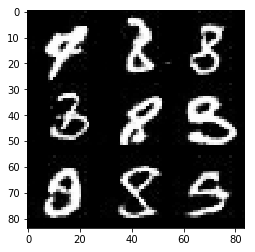

Epoch 2/2 Discriminator Loss: 2.3363 Generator Loss: 0.2297
Epoch 2/2 Discriminator Loss: 0.9337 Generator Loss: 1.3769
Epoch 2/2 Discriminator Loss: 1.2028 Generator Loss: 0.7337
Epoch 2/2 Discriminator Loss: 1.0364 Generator Loss: 1.4770
Epoch 2/2 Discriminator Loss: 0.7648 Generator Loss: 2.0120
Epoch 2/2 Discriminator Loss: 1.7284 Generator Loss: 0.4396
Epoch 2/2 Discriminator Loss: 1.3334 Generator Loss: 0.6970
Epoch 2/2 Discriminator Loss: 1.1246 Generator Loss: 0.9527
Epoch 2/2 Discriminator Loss: 1.0953 Generator Loss: 0.9344
Epoch 2/2 Discriminator Loss: 1.0306 Generator Loss: 0.9243


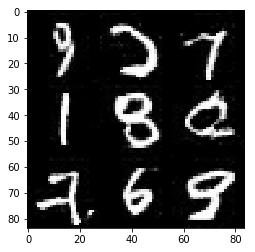

Epoch 2/2 Discriminator Loss: 0.9090 Generator Loss: 1.0893
Epoch 2/2 Discriminator Loss: 0.9278 Generator Loss: 1.2246
Epoch 2/2 Discriminator Loss: 1.6153 Generator Loss: 0.4357
Epoch 2/2 Discriminator Loss: 1.1793 Generator Loss: 0.8676
Epoch 2/2 Discriminator Loss: 1.2163 Generator Loss: 0.7447
Epoch 2/2 Discriminator Loss: 0.8259 Generator Loss: 1.2711
Epoch 2/2 Discriminator Loss: 1.0173 Generator Loss: 0.9304
Epoch 2/2 Discriminator Loss: 1.0347 Generator Loss: 0.9682
Epoch 2/2 Discriminator Loss: 1.3662 Generator Loss: 0.6039
Epoch 2/2 Discriminator Loss: 1.6644 Generator Loss: 0.4505


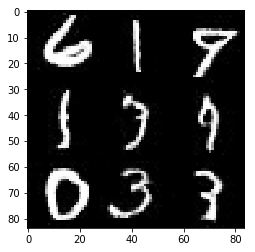

Epoch 2/2 Discriminator Loss: 1.6927 Generator Loss: 0.4430
Epoch 2/2 Discriminator Loss: 1.3815 Generator Loss: 0.5458
Epoch 2/2 Discriminator Loss: 1.3799 Generator Loss: 0.5678
Epoch 2/2 Discriminator Loss: 0.9234 Generator Loss: 1.2411
Epoch 2/2 Discriminator Loss: 1.4591 Generator Loss: 0.5499
Epoch 2/2 Discriminator Loss: 2.2030 Generator Loss: 0.2506
Epoch 2/2 Discriminator Loss: 1.3141 Generator Loss: 0.7148
Epoch 2/2 Discriminator Loss: 1.8569 Generator Loss: 0.3497
Epoch 2/2 Discriminator Loss: 1.1753 Generator Loss: 0.7718
Epoch 2/2 Discriminator Loss: 0.9261 Generator Loss: 1.2922


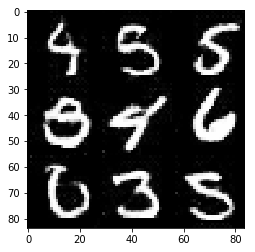

Epoch 2/2 Discriminator Loss: 2.2645 Generator Loss: 0.2680
Epoch 2/2 Discriminator Loss: 0.9346 Generator Loss: 1.5241
Epoch 2/2 Discriminator Loss: 1.5273 Generator Loss: 0.4466
Epoch 2/2 Discriminator Loss: 0.9348 Generator Loss: 1.4925
Epoch 2/2 Discriminator Loss: 1.4231 Generator Loss: 0.5897
Epoch 2/2 Discriminator Loss: 1.9703 Generator Loss: 0.3332
Epoch 2/2 Discriminator Loss: 1.8185 Generator Loss: 0.3834
Epoch 2/2 Discriminator Loss: 1.0382 Generator Loss: 0.9862
Epoch 2/2 Discriminator Loss: 0.9521 Generator Loss: 1.7256
Epoch 2/2 Discriminator Loss: 1.2999 Generator Loss: 0.6785


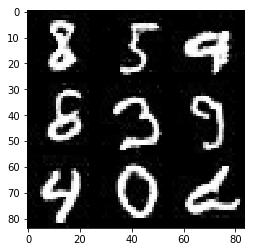

Epoch 2/2 Discriminator Loss: 1.1389 Generator Loss: 0.8185
Epoch 2/2 Discriminator Loss: 1.1390 Generator Loss: 0.8257
Epoch 2/2 Discriminator Loss: 1.3020 Generator Loss: 0.7052
Epoch 2/2 Discriminator Loss: 1.8361 Generator Loss: 0.4729
Epoch 2/2 Discriminator Loss: 1.6290 Generator Loss: 2.2925


In [18]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

1 64 100 0.002 0.5 <bound method Dataset.get_batches of <helper.Dataset object at 0x7f5a09d111d0>> (202599, 28, 28, 3) RGB
Epoch 1/1 Discriminator Loss: 0.4674 Generator Loss: 2.8244
Epoch 1/1 Discriminator Loss: 0.4090 Generator Loss: 2.9524
Epoch 1/1 Discriminator Loss: 6.8074 Generator Loss: 16.1473
Epoch 1/1 Discriminator Loss: 1.2365 Generator Loss: 0.7856
Epoch 1/1 Discriminator Loss: 0.7002 Generator Loss: 4.4270
Epoch 1/1 Discriminator Loss: 1.2526 Generator Loss: 3.2225
Epoch 1/1 Discriminator Loss: 0.6045 Generator Loss: 2.8160
Epoch 1/1 Discriminator Loss: 0.5705 Generator Loss: 1.9348
Epoch 1/1 Discriminator Loss: 1.0193 Generator Loss: 1.8205
Epoch 1/1 Discriminator Loss: 3.6415 Generator Loss: 6.7413


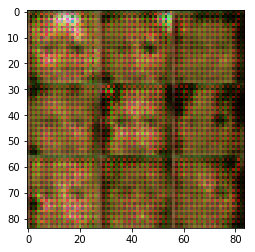

Epoch 1/1 Discriminator Loss: 1.6714 Generator Loss: 0.4867
Epoch 1/1 Discriminator Loss: 1.8612 Generator Loss: 1.7780
Epoch 1/1 Discriminator Loss: 1.4888 Generator Loss: 1.0582
Epoch 1/1 Discriminator Loss: 1.3746 Generator Loss: 1.1074
Epoch 1/1 Discriminator Loss: 1.2490 Generator Loss: 0.7073
Epoch 1/1 Discriminator Loss: 1.9394 Generator Loss: 0.3274
Epoch 1/1 Discriminator Loss: 1.8914 Generator Loss: 0.3038
Epoch 1/1 Discriminator Loss: 1.4952 Generator Loss: 0.4740
Epoch 1/1 Discriminator Loss: 1.4969 Generator Loss: 1.0864
Epoch 1/1 Discriminator Loss: 1.3055 Generator Loss: 1.0369


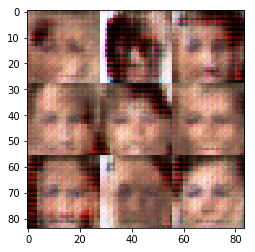

Epoch 1/1 Discriminator Loss: 1.5627 Generator Loss: 1.9575
Epoch 1/1 Discriminator Loss: 1.3836 Generator Loss: 0.7609
Epoch 1/1 Discriminator Loss: 1.6246 Generator Loss: 0.5010
Epoch 1/1 Discriminator Loss: 1.8784 Generator Loss: 0.3343
Epoch 1/1 Discriminator Loss: 1.4305 Generator Loss: 0.6811
Epoch 1/1 Discriminator Loss: 1.5014 Generator Loss: 0.4418
Epoch 1/1 Discriminator Loss: 1.4167 Generator Loss: 0.7114
Epoch 1/1 Discriminator Loss: 1.6626 Generator Loss: 0.4912
Epoch 1/1 Discriminator Loss: 1.6944 Generator Loss: 0.5640
Epoch 1/1 Discriminator Loss: 1.6171 Generator Loss: 0.4492


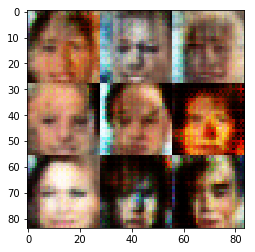

Epoch 1/1 Discriminator Loss: 1.4163 Generator Loss: 0.9940
Epoch 1/1 Discriminator Loss: 1.4293 Generator Loss: 0.6627
Epoch 1/1 Discriminator Loss: 1.4947 Generator Loss: 0.5792
Epoch 1/1 Discriminator Loss: 1.5357 Generator Loss: 0.5152
Epoch 1/1 Discriminator Loss: 1.4106 Generator Loss: 0.8126
Epoch 1/1 Discriminator Loss: 1.3063 Generator Loss: 0.9742
Epoch 1/1 Discriminator Loss: 1.5854 Generator Loss: 1.4641
Epoch 1/1 Discriminator Loss: 1.3748 Generator Loss: 0.7856
Epoch 1/1 Discriminator Loss: 1.3441 Generator Loss: 1.1808
Epoch 1/1 Discriminator Loss: 1.9540 Generator Loss: 0.2649


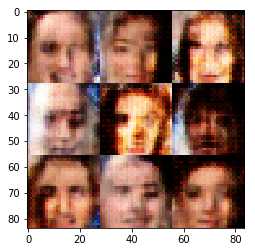

Epoch 1/1 Discriminator Loss: 1.5187 Generator Loss: 0.4376
Epoch 1/1 Discriminator Loss: 1.3854 Generator Loss: 0.5927
Epoch 1/1 Discriminator Loss: 1.4062 Generator Loss: 0.5823
Epoch 1/1 Discriminator Loss: 1.5708 Generator Loss: 0.4218
Epoch 1/1 Discriminator Loss: 1.3367 Generator Loss: 0.6234
Epoch 1/1 Discriminator Loss: 1.3508 Generator Loss: 0.7460
Epoch 1/1 Discriminator Loss: 1.3842 Generator Loss: 0.8251
Epoch 1/1 Discriminator Loss: 1.4436 Generator Loss: 0.5405
Epoch 1/1 Discriminator Loss: 1.4592 Generator Loss: 0.8868
Epoch 1/1 Discriminator Loss: 1.4440 Generator Loss: 0.6254


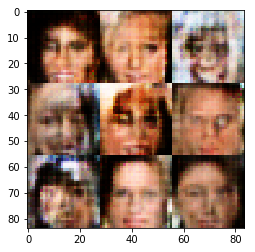

Epoch 1/1 Discriminator Loss: 1.5264 Generator Loss: 0.5713
Epoch 1/1 Discriminator Loss: 1.4977 Generator Loss: 1.2176
Epoch 1/1 Discriminator Loss: 1.3700 Generator Loss: 0.7342
Epoch 1/1 Discriminator Loss: 1.4029 Generator Loss: 0.9221
Epoch 1/1 Discriminator Loss: 1.8030 Generator Loss: 0.3735
Epoch 1/1 Discriminator Loss: 1.3182 Generator Loss: 0.6872
Epoch 1/1 Discriminator Loss: 1.3768 Generator Loss: 0.6468
Epoch 1/1 Discriminator Loss: 1.4773 Generator Loss: 0.5036
Epoch 1/1 Discriminator Loss: 1.3468 Generator Loss: 0.7325
Epoch 1/1 Discriminator Loss: 1.3181 Generator Loss: 0.9474


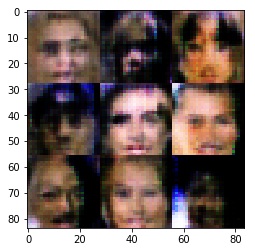

Epoch 1/1 Discriminator Loss: 1.4257 Generator Loss: 0.6310
Epoch 1/1 Discriminator Loss: 1.6953 Generator Loss: 0.3531
Epoch 1/1 Discriminator Loss: 1.2934 Generator Loss: 0.8152
Epoch 1/1 Discriminator Loss: 1.2398 Generator Loss: 1.0543
Epoch 1/1 Discriminator Loss: 1.3681 Generator Loss: 0.8841
Epoch 1/1 Discriminator Loss: 1.5359 Generator Loss: 0.5004
Epoch 1/1 Discriminator Loss: 1.4784 Generator Loss: 1.3930
Epoch 1/1 Discriminator Loss: 1.3266 Generator Loss: 0.7628
Epoch 1/1 Discriminator Loss: 1.6070 Generator Loss: 0.7708
Epoch 1/1 Discriminator Loss: 1.4991 Generator Loss: 0.8409


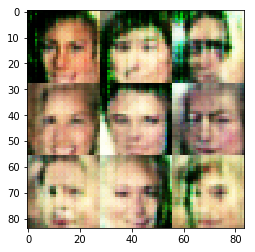

Epoch 1/1 Discriminator Loss: 1.6277 Generator Loss: 0.3788
Epoch 1/1 Discriminator Loss: 1.4209 Generator Loss: 0.6289
Epoch 1/1 Discriminator Loss: 1.5178 Generator Loss: 0.5657
Epoch 1/1 Discriminator Loss: 1.7045 Generator Loss: 0.3472
Epoch 1/1 Discriminator Loss: 1.2816 Generator Loss: 0.7611
Epoch 1/1 Discriminator Loss: 1.3742 Generator Loss: 1.5976
Epoch 1/1 Discriminator Loss: 1.5168 Generator Loss: 0.5182
Epoch 1/1 Discriminator Loss: 1.4948 Generator Loss: 0.5654
Epoch 1/1 Discriminator Loss: 1.3039 Generator Loss: 1.1816
Epoch 1/1 Discriminator Loss: 1.7308 Generator Loss: 0.3222


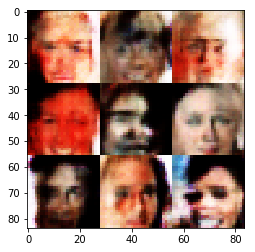

Epoch 1/1 Discriminator Loss: 1.5420 Generator Loss: 0.5774
Epoch 1/1 Discriminator Loss: 1.4974 Generator Loss: 0.4941
Epoch 1/1 Discriminator Loss: 1.4123 Generator Loss: 0.7058
Epoch 1/1 Discriminator Loss: 1.6437 Generator Loss: 1.0791
Epoch 1/1 Discriminator Loss: 1.4730 Generator Loss: 0.5624
Epoch 1/1 Discriminator Loss: 1.4255 Generator Loss: 0.7532
Epoch 1/1 Discriminator Loss: 1.4533 Generator Loss: 0.9157
Epoch 1/1 Discriminator Loss: 1.4264 Generator Loss: 0.7961
Epoch 1/1 Discriminator Loss: 1.4376 Generator Loss: 0.5266
Epoch 1/1 Discriminator Loss: 1.4572 Generator Loss: 0.7924


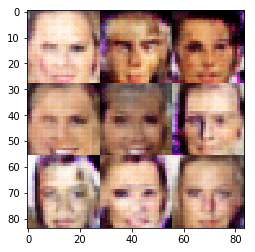

Epoch 1/1 Discriminator Loss: 1.4503 Generator Loss: 0.5630
Epoch 1/1 Discriminator Loss: 1.3319 Generator Loss: 0.6815
Epoch 1/1 Discriminator Loss: 1.2818 Generator Loss: 0.7426
Epoch 1/1 Discriminator Loss: 1.3358 Generator Loss: 0.7712
Epoch 1/1 Discriminator Loss: 1.2557 Generator Loss: 1.0142
Epoch 1/1 Discriminator Loss: 1.3587 Generator Loss: 0.6518
Epoch 1/1 Discriminator Loss: 1.6226 Generator Loss: 1.2679
Epoch 1/1 Discriminator Loss: 1.4775 Generator Loss: 0.5655
Epoch 1/1 Discriminator Loss: 1.5051 Generator Loss: 0.8694
Epoch 1/1 Discriminator Loss: 1.5884 Generator Loss: 0.4481


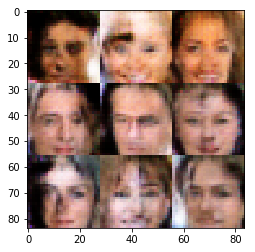

Epoch 1/1 Discriminator Loss: 1.4122 Generator Loss: 0.6035
Epoch 1/1 Discriminator Loss: 1.4618 Generator Loss: 0.6109
Epoch 1/1 Discriminator Loss: 1.3978 Generator Loss: 0.7370
Epoch 1/1 Discriminator Loss: 1.5112 Generator Loss: 1.3655
Epoch 1/1 Discriminator Loss: 1.3158 Generator Loss: 0.8431
Epoch 1/1 Discriminator Loss: 1.4559 Generator Loss: 0.6461
Epoch 1/1 Discriminator Loss: 1.4408 Generator Loss: 0.6742
Epoch 1/1 Discriminator Loss: 1.5253 Generator Loss: 0.6110
Epoch 1/1 Discriminator Loss: 1.4599 Generator Loss: 0.6177
Epoch 1/1 Discriminator Loss: 1.2587 Generator Loss: 0.8595


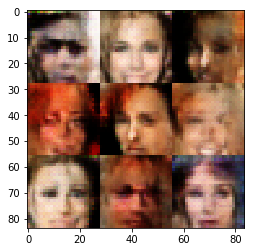

Epoch 1/1 Discriminator Loss: 1.6152 Generator Loss: 0.4925
Epoch 1/1 Discriminator Loss: 1.4183 Generator Loss: 0.7456
Epoch 1/1 Discriminator Loss: 1.6023 Generator Loss: 1.2552
Epoch 1/1 Discriminator Loss: 1.5243 Generator Loss: 0.4547
Epoch 1/1 Discriminator Loss: 1.5894 Generator Loss: 0.4257
Epoch 1/1 Discriminator Loss: 1.5481 Generator Loss: 0.4925
Epoch 1/1 Discriminator Loss: 1.4074 Generator Loss: 0.7538
Epoch 1/1 Discriminator Loss: 1.3695 Generator Loss: 0.6309
Epoch 1/1 Discriminator Loss: 1.4598 Generator Loss: 0.8994
Epoch 1/1 Discriminator Loss: 1.3500 Generator Loss: 0.7089


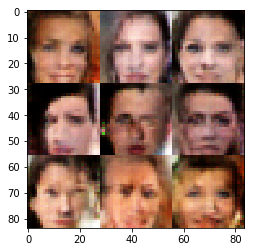

Epoch 1/1 Discriminator Loss: 1.4513 Generator Loss: 0.5695
Epoch 1/1 Discriminator Loss: 1.4645 Generator Loss: 1.1142
Epoch 1/1 Discriminator Loss: 1.4377 Generator Loss: 0.7778
Epoch 1/1 Discriminator Loss: 1.3688 Generator Loss: 0.8354
Epoch 1/1 Discriminator Loss: 1.4671 Generator Loss: 0.8385
Epoch 1/1 Discriminator Loss: 1.3943 Generator Loss: 0.8307
Epoch 1/1 Discriminator Loss: 1.4807 Generator Loss: 0.6559
Epoch 1/1 Discriminator Loss: 1.4880 Generator Loss: 0.5516
Epoch 1/1 Discriminator Loss: 1.4272 Generator Loss: 0.8645
Epoch 1/1 Discriminator Loss: 1.5989 Generator Loss: 1.1216


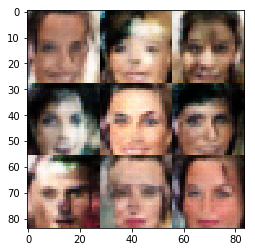

Epoch 1/1 Discriminator Loss: 1.4266 Generator Loss: 0.6694
Epoch 1/1 Discriminator Loss: 1.4424 Generator Loss: 0.8347
Epoch 1/1 Discriminator Loss: 1.4965 Generator Loss: 0.7524
Epoch 1/1 Discriminator Loss: 1.4682 Generator Loss: 0.8955
Epoch 1/1 Discriminator Loss: 1.3569 Generator Loss: 0.7743
Epoch 1/1 Discriminator Loss: 1.5299 Generator Loss: 0.5558
Epoch 1/1 Discriminator Loss: 1.3408 Generator Loss: 0.7191
Epoch 1/1 Discriminator Loss: 1.6116 Generator Loss: 1.1210
Epoch 1/1 Discriminator Loss: 1.3670 Generator Loss: 0.5915
Epoch 1/1 Discriminator Loss: 1.4325 Generator Loss: 0.5769


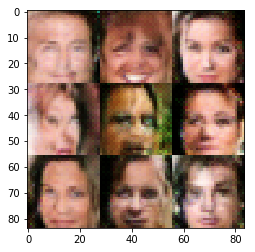

Epoch 1/1 Discriminator Loss: 1.3474 Generator Loss: 0.7100
Epoch 1/1 Discriminator Loss: 1.4432 Generator Loss: 0.7443
Epoch 1/1 Discriminator Loss: 1.4064 Generator Loss: 0.5853
Epoch 1/1 Discriminator Loss: 1.4967 Generator Loss: 0.8116
Epoch 1/1 Discriminator Loss: 1.3279 Generator Loss: 0.7730
Epoch 1/1 Discriminator Loss: 1.3871 Generator Loss: 0.6797
Epoch 1/1 Discriminator Loss: 1.4369 Generator Loss: 0.7266
Epoch 1/1 Discriminator Loss: 1.4855 Generator Loss: 0.7975
Epoch 1/1 Discriminator Loss: 1.4447 Generator Loss: 0.6471
Epoch 1/1 Discriminator Loss: 1.4717 Generator Loss: 0.9936


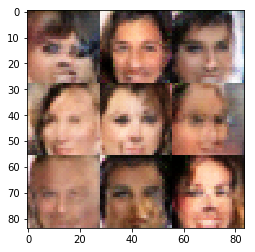

Epoch 1/1 Discriminator Loss: 1.4138 Generator Loss: 0.8299
Epoch 1/1 Discriminator Loss: 1.4038 Generator Loss: 0.8334
Epoch 1/1 Discriminator Loss: 1.4341 Generator Loss: 1.0246
Epoch 1/1 Discriminator Loss: 1.4421 Generator Loss: 0.6738
Epoch 1/1 Discriminator Loss: 1.8115 Generator Loss: 0.3414
Epoch 1/1 Discriminator Loss: 1.4111 Generator Loss: 0.5938
Epoch 1/1 Discriminator Loss: 1.5173 Generator Loss: 0.5256
Epoch 1/1 Discriminator Loss: 1.4307 Generator Loss: 0.9754
Epoch 1/1 Discriminator Loss: 1.2833 Generator Loss: 0.8124
Epoch 1/1 Discriminator Loss: 1.4444 Generator Loss: 0.7153


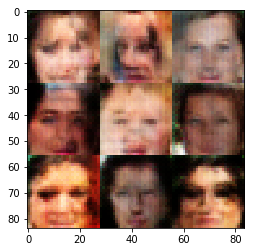

Epoch 1/1 Discriminator Loss: 1.4339 Generator Loss: 0.6892
Epoch 1/1 Discriminator Loss: 1.3264 Generator Loss: 0.7041
Epoch 1/1 Discriminator Loss: 1.4747 Generator Loss: 0.6499
Epoch 1/1 Discriminator Loss: 1.5601 Generator Loss: 0.5212
Epoch 1/1 Discriminator Loss: 1.6069 Generator Loss: 0.4687
Epoch 1/1 Discriminator Loss: 1.5392 Generator Loss: 0.5408
Epoch 1/1 Discriminator Loss: 1.6951 Generator Loss: 0.3675
Epoch 1/1 Discriminator Loss: 1.5224 Generator Loss: 0.6944
Epoch 1/1 Discriminator Loss: 1.4211 Generator Loss: 0.6209
Epoch 1/1 Discriminator Loss: 1.4587 Generator Loss: 0.6136


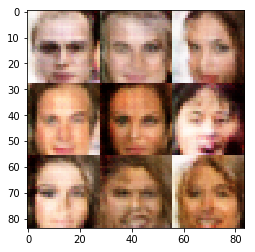

Epoch 1/1 Discriminator Loss: 1.4928 Generator Loss: 0.6089
Epoch 1/1 Discriminator Loss: 1.4973 Generator Loss: 0.5865
Epoch 1/1 Discriminator Loss: 1.4406 Generator Loss: 0.6123
Epoch 1/1 Discriminator Loss: 1.4740 Generator Loss: 0.9435
Epoch 1/1 Discriminator Loss: 1.3568 Generator Loss: 0.7255
Epoch 1/1 Discriminator Loss: 1.4213 Generator Loss: 0.7062
Epoch 1/1 Discriminator Loss: 1.4160 Generator Loss: 0.7063
Epoch 1/1 Discriminator Loss: 1.3974 Generator Loss: 0.8163
Epoch 1/1 Discriminator Loss: 1.4467 Generator Loss: 0.6369
Epoch 1/1 Discriminator Loss: 1.6645 Generator Loss: 0.3718


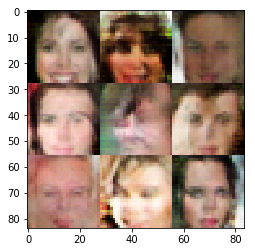

Epoch 1/1 Discriminator Loss: 1.4423 Generator Loss: 0.7407
Epoch 1/1 Discriminator Loss: 1.4950 Generator Loss: 0.7150
Epoch 1/1 Discriminator Loss: 1.5145 Generator Loss: 0.5900
Epoch 1/1 Discriminator Loss: 1.4792 Generator Loss: 0.6770
Epoch 1/1 Discriminator Loss: 1.5159 Generator Loss: 0.5544
Epoch 1/1 Discriminator Loss: 1.5271 Generator Loss: 0.5613
Epoch 1/1 Discriminator Loss: 1.2553 Generator Loss: 1.0183
Epoch 1/1 Discriminator Loss: 1.4931 Generator Loss: 0.7158
Epoch 1/1 Discriminator Loss: 1.4983 Generator Loss: 0.5019
Epoch 1/1 Discriminator Loss: 1.4811 Generator Loss: 0.5705


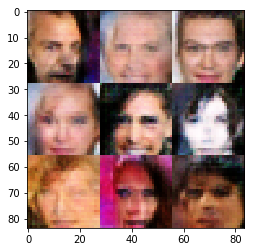

Epoch 1/1 Discriminator Loss: 1.4962 Generator Loss: 0.5851
Epoch 1/1 Discriminator Loss: 1.5072 Generator Loss: 0.5823
Epoch 1/1 Discriminator Loss: 1.4981 Generator Loss: 0.6580
Epoch 1/1 Discriminator Loss: 1.5424 Generator Loss: 0.5461
Epoch 1/1 Discriminator Loss: 1.4282 Generator Loss: 0.7056
Epoch 1/1 Discriminator Loss: 1.6342 Generator Loss: 0.8790
Epoch 1/1 Discriminator Loss: 1.4762 Generator Loss: 0.5937
Epoch 1/1 Discriminator Loss: 1.3928 Generator Loss: 0.7290
Epoch 1/1 Discriminator Loss: 1.5807 Generator Loss: 0.5338
Epoch 1/1 Discriminator Loss: 1.3693 Generator Loss: 0.6775


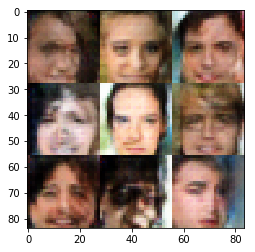

Epoch 1/1 Discriminator Loss: 1.5012 Generator Loss: 0.6471
Epoch 1/1 Discriminator Loss: 1.4976 Generator Loss: 0.5923
Epoch 1/1 Discriminator Loss: 1.5446 Generator Loss: 0.4701
Epoch 1/1 Discriminator Loss: 1.4723 Generator Loss: 0.6001
Epoch 1/1 Discriminator Loss: 1.4980 Generator Loss: 0.6824
Epoch 1/1 Discriminator Loss: 1.4325 Generator Loss: 0.6467
Epoch 1/1 Discriminator Loss: 1.3657 Generator Loss: 0.7386
Epoch 1/1 Discriminator Loss: 1.6613 Generator Loss: 0.4199
Epoch 1/1 Discriminator Loss: 1.4373 Generator Loss: 0.7204
Epoch 1/1 Discriminator Loss: 1.4294 Generator Loss: 0.7411


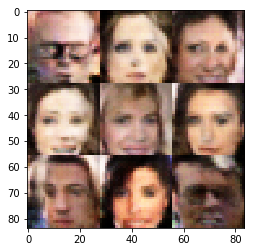

Epoch 1/1 Discriminator Loss: 1.4582 Generator Loss: 0.6763
Epoch 1/1 Discriminator Loss: 1.4634 Generator Loss: 0.5579
Epoch 1/1 Discriminator Loss: 1.6278 Generator Loss: 0.5311
Epoch 1/1 Discriminator Loss: 1.4644 Generator Loss: 0.5810
Epoch 1/1 Discriminator Loss: 1.3189 Generator Loss: 0.8799
Epoch 1/1 Discriminator Loss: 1.6119 Generator Loss: 0.5024
Epoch 1/1 Discriminator Loss: 1.5932 Generator Loss: 0.4774
Epoch 1/1 Discriminator Loss: 1.5277 Generator Loss: 0.5264
Epoch 1/1 Discriminator Loss: 1.5939 Generator Loss: 0.4478
Epoch 1/1 Discriminator Loss: 1.4045 Generator Loss: 0.7164


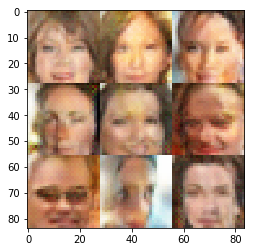

Epoch 1/1 Discriminator Loss: 1.4852 Generator Loss: 0.5713
Epoch 1/1 Discriminator Loss: 1.4840 Generator Loss: 0.6527
Epoch 1/1 Discriminator Loss: 1.5803 Generator Loss: 0.5714
Epoch 1/1 Discriminator Loss: 1.3931 Generator Loss: 0.5790
Epoch 1/1 Discriminator Loss: 1.4504 Generator Loss: 0.7175
Epoch 1/1 Discriminator Loss: 1.4054 Generator Loss: 0.6748
Epoch 1/1 Discriminator Loss: 1.5005 Generator Loss: 0.5459
Epoch 1/1 Discriminator Loss: 1.5878 Generator Loss: 0.4588
Epoch 1/1 Discriminator Loss: 1.5339 Generator Loss: 0.4482
Epoch 1/1 Discriminator Loss: 1.5281 Generator Loss: 0.7121


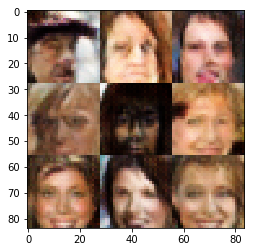

Epoch 1/1 Discriminator Loss: 1.4718 Generator Loss: 0.7272
Epoch 1/1 Discriminator Loss: 1.5721 Generator Loss: 0.4393
Epoch 1/1 Discriminator Loss: 1.3876 Generator Loss: 0.7779
Epoch 1/1 Discriminator Loss: 1.4610 Generator Loss: 0.8255
Epoch 1/1 Discriminator Loss: 1.6240 Generator Loss: 0.7257
Epoch 1/1 Discriminator Loss: 1.3990 Generator Loss: 0.6527
Epoch 1/1 Discriminator Loss: 1.3818 Generator Loss: 0.9026
Epoch 1/1 Discriminator Loss: 1.4307 Generator Loss: 0.6558
Epoch 1/1 Discriminator Loss: 1.5198 Generator Loss: 0.6965
Epoch 1/1 Discriminator Loss: 1.4863 Generator Loss: 0.5936


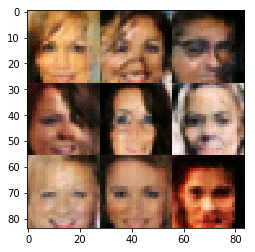

Epoch 1/1 Discriminator Loss: 1.6758 Generator Loss: 0.3897
Epoch 1/1 Discriminator Loss: 1.4348 Generator Loss: 0.5939
Epoch 1/1 Discriminator Loss: 1.6007 Generator Loss: 0.5266
Epoch 1/1 Discriminator Loss: 1.4848 Generator Loss: 0.5809
Epoch 1/1 Discriminator Loss: 1.4631 Generator Loss: 0.6962
Epoch 1/1 Discriminator Loss: 1.5087 Generator Loss: 0.5471
Epoch 1/1 Discriminator Loss: 1.4774 Generator Loss: 0.9753
Epoch 1/1 Discriminator Loss: 1.4407 Generator Loss: 0.7531
Epoch 1/1 Discriminator Loss: 1.3536 Generator Loss: 0.7799
Epoch 1/1 Discriminator Loss: 1.5223 Generator Loss: 0.6335


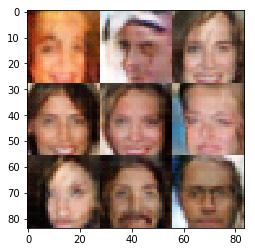

Epoch 1/1 Discriminator Loss: 1.4591 Generator Loss: 0.6141
Epoch 1/1 Discriminator Loss: 1.5270 Generator Loss: 0.5182
Epoch 1/1 Discriminator Loss: 1.5799 Generator Loss: 0.4486
Epoch 1/1 Discriminator Loss: 1.3890 Generator Loss: 0.6149
Epoch 1/1 Discriminator Loss: 1.5458 Generator Loss: 0.5152
Epoch 1/1 Discriminator Loss: 1.3801 Generator Loss: 0.6360
Epoch 1/1 Discriminator Loss: 1.4043 Generator Loss: 0.7073
Epoch 1/1 Discriminator Loss: 1.5460 Generator Loss: 0.5561
Epoch 1/1 Discriminator Loss: 1.4814 Generator Loss: 0.6387
Epoch 1/1 Discriminator Loss: 1.5087 Generator Loss: 0.6539


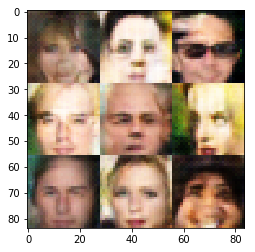

Epoch 1/1 Discriminator Loss: 1.4373 Generator Loss: 0.8686
Epoch 1/1 Discriminator Loss: 1.5380 Generator Loss: 0.7290
Epoch 1/1 Discriminator Loss: 1.3873 Generator Loss: 0.7467
Epoch 1/1 Discriminator Loss: 1.5703 Generator Loss: 0.4312
Epoch 1/1 Discriminator Loss: 1.4468 Generator Loss: 0.6377
Epoch 1/1 Discriminator Loss: 1.5012 Generator Loss: 0.5873
Epoch 1/1 Discriminator Loss: 1.5009 Generator Loss: 0.6066
Epoch 1/1 Discriminator Loss: 1.5773 Generator Loss: 0.5093
Epoch 1/1 Discriminator Loss: 1.4622 Generator Loss: 0.6544
Epoch 1/1 Discriminator Loss: 1.5013 Generator Loss: 0.5729


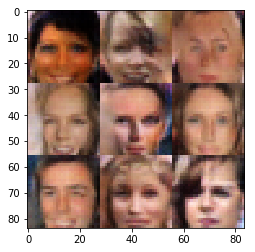

Epoch 1/1 Discriminator Loss: 1.4792 Generator Loss: 0.6900
Epoch 1/1 Discriminator Loss: 1.4430 Generator Loss: 0.6494
Epoch 1/1 Discriminator Loss: 1.5341 Generator Loss: 0.5172
Epoch 1/1 Discriminator Loss: 1.4127 Generator Loss: 0.7051
Epoch 1/1 Discriminator Loss: 1.4373 Generator Loss: 0.7346
Epoch 1/1 Discriminator Loss: 1.3425 Generator Loss: 0.7975
Epoch 1/1 Discriminator Loss: 1.4491 Generator Loss: 0.7242
Epoch 1/1 Discriminator Loss: 1.5056 Generator Loss: 0.5394
Epoch 1/1 Discriminator Loss: 1.4663 Generator Loss: 0.7160
Epoch 1/1 Discriminator Loss: 1.5516 Generator Loss: 0.5210


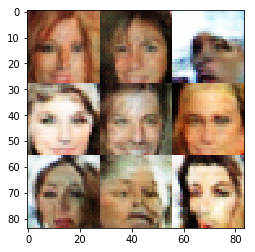

Epoch 1/1 Discriminator Loss: 1.5016 Generator Loss: 0.5485
Epoch 1/1 Discriminator Loss: 1.5040 Generator Loss: 0.5656
Epoch 1/1 Discriminator Loss: 1.4117 Generator Loss: 0.7541
Epoch 1/1 Discriminator Loss: 1.4781 Generator Loss: 0.5771
Epoch 1/1 Discriminator Loss: 1.6238 Generator Loss: 0.4364
Epoch 1/1 Discriminator Loss: 1.6550 Generator Loss: 0.4603
Epoch 1/1 Discriminator Loss: 1.6893 Generator Loss: 0.5276
Epoch 1/1 Discriminator Loss: 1.4486 Generator Loss: 0.9711
Epoch 1/1 Discriminator Loss: 1.5143 Generator Loss: 0.6558
Epoch 1/1 Discriminator Loss: 1.5164 Generator Loss: 0.5860


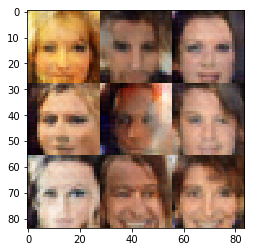

Epoch 1/1 Discriminator Loss: 1.4539 Generator Loss: 0.6347
Epoch 1/1 Discriminator Loss: 1.5605 Generator Loss: 0.4687
Epoch 1/1 Discriminator Loss: 1.5400 Generator Loss: 0.5754
Epoch 1/1 Discriminator Loss: 1.4781 Generator Loss: 0.6269
Epoch 1/1 Discriminator Loss: 1.5415 Generator Loss: 0.4907
Epoch 1/1 Discriminator Loss: 1.5580 Generator Loss: 0.6144
Epoch 1/1 Discriminator Loss: 1.5198 Generator Loss: 0.6274
Epoch 1/1 Discriminator Loss: 1.4303 Generator Loss: 0.6566
Epoch 1/1 Discriminator Loss: 1.4107 Generator Loss: 0.5898
Epoch 1/1 Discriminator Loss: 1.5956 Generator Loss: 0.5164


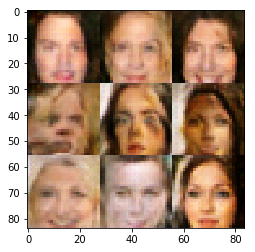

Epoch 1/1 Discriminator Loss: 1.6188 Generator Loss: 0.5186
Epoch 1/1 Discriminator Loss: 1.4324 Generator Loss: 0.5980
Epoch 1/1 Discriminator Loss: 1.5873 Generator Loss: 0.5070
Epoch 1/1 Discriminator Loss: 1.5443 Generator Loss: 0.8088
Epoch 1/1 Discriminator Loss: 1.4968 Generator Loss: 0.5642
Epoch 1/1 Discriminator Loss: 1.4363 Generator Loss: 0.7098
Epoch 1/1 Discriminator Loss: 1.4507 Generator Loss: 0.6425
Epoch 1/1 Discriminator Loss: 1.4055 Generator Loss: 0.7197
Epoch 1/1 Discriminator Loss: 1.4755 Generator Loss: 0.8771
Epoch 1/1 Discriminator Loss: 1.4590 Generator Loss: 0.6667


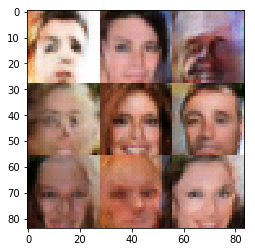

Epoch 1/1 Discriminator Loss: 1.4201 Generator Loss: 0.6830
Epoch 1/1 Discriminator Loss: 1.4274 Generator Loss: 0.7182
Epoch 1/1 Discriminator Loss: 1.5447 Generator Loss: 0.4959
Epoch 1/1 Discriminator Loss: 1.6605 Generator Loss: 0.4194
Epoch 1/1 Discriminator Loss: 1.6442 Generator Loss: 0.6030
Epoch 1/1 Discriminator Loss: 1.5935 Generator Loss: 0.6870


In [17]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.